The Sparks Foundation

Prediction using Supervised ML


Task 1 : Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [2]:
# Importing all libraries required for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# @title
# Importing and reading the data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


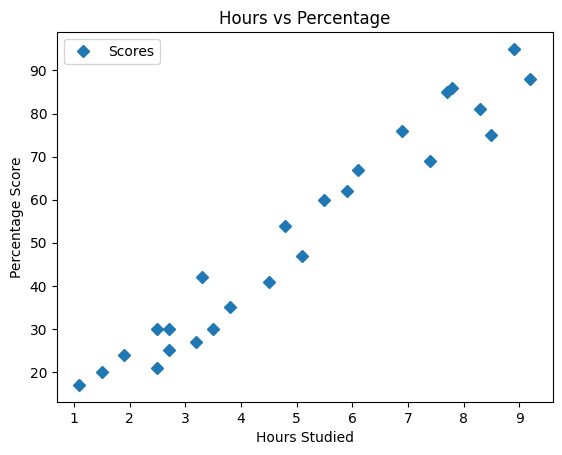

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='D')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Data Preparation

In [5]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

Training the Algorithm

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


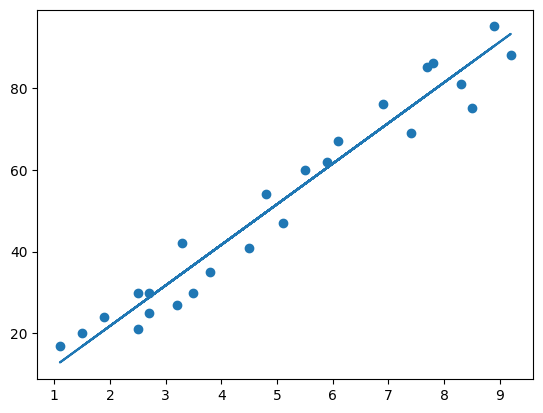

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Predicting the Scores

In [9]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing the Actual Data with respect to Predicted Data

In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Let's predict the score for 6 hours of studying

In [19]:
# Define the number of hours
hours = 6

# Assuming 'regressor' is your trained regression model
own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 6
Predicted Score = 61.482098925288106


Now, Let's predict the score for 8 hours of studying

In [20]:
# Define the number of hours
hours = 8

# Assuming 'regressor' is your trained regression model
own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8
Predicted Score = 81.30341188657258


In [12]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
